In [1]:
# load Providentia interactive class
from providentia import Interactive

In [2]:
# magic to make plots appear inline
%matplotlib inline

In [3]:
# read and filter data from .conf (keeping stations only in Spain)
provi = Interactive(conf='interactive_template.conf', subsection='STANDARD·Spain')

Generating file trees...
Reading data

OBSERVATIONS
 - EBAS|sconco3
 - EBAS|sconcno2
EXPERIMENTS
 - cams61_emep_ph2-eu-000 (EMEP)
 - cams61_monarch_ph2-eu-000 (MONARCH)
 - cams61_silam_ph2-eu-000 (SILAM)

Resetting filter for STANDARD·Spain
Filtering data


In [4]:
# print .conf
provi.print_config()

[STANDARD]
network = EBAS
species = sconco3, sconcno2
resolution = hourly
start_date = 20180101
end_date = 20190101
experiments = cams61_emep_ph2-eu-000, cams61_monarch_ph2-eu-000, cams61_silam_ph2-eu-000 (EMEP, MONARCH, SILAM)
observations_data_label = OBS
temporal_colocation = True
spatial_colocation = False
report_type = debug
report_summary = True
report_stations = False
report_title = Providentia Report
report_filename = standard
statistic_mode = Temporal|Spatial
statistic_aggregation = Median
periodic_statistic_mode = Independent
periodic_statistic_aggregation = Median
timeseries_statistic_aggregation = Median
remove_extreme_stations = CAMS

    [[France]]
    country = keep: France ||

    [[Spain]]
    country = keep: Spain ||




In [5]:
# save data to netCDF
provi.save(format='nc')

Data saved to /home/avilanov/software/Providentia/saved_data/PRV_20250107_1215.nc


In [6]:
# return data in memory (in Xarray format)
data = provi.get_data(format='xr')
data

<xarray.Dataset> Size: 8MB
Dimensions:                                                                         (
                                                                                     time: 8760,
                                                                                     data_label: 4,
                                                                                     ghost_data_variable: 7,
                                                                                     station_EBAS|sconco3: 13,
                                                                                     qa: 79,
                                                                                     flag: 186,
                                                                                     month: 12,
                                                                                     station_EBAS|sconcno2: 4)
Coordinates:
  * time                                                                            (time) datetime64[ns] 70kB ...
Dimensions without coordinates: data_label, ghost_data_variable,
                                station_EBAS|sconco3, qa, flag, month,
                                station_EBAS|sconcno2
Data variables: (12/304)
    data_labels                                                                     (data_label) <U7 112B ...
    ghost_data_variables                                                            (ghost_data_variable) <U39 1kB ...
    EBAS|sconco3_data                                                               (data_label, station_EBAS|sconco3, time) float32 2MB ...
    EBAS|sconco3_ghost_data                                                         (ghost_data_variable, station_EBAS|sconco3, time) float32 3MB ...
    EBAS|sconco3_qa                                                                 (qa) float32 316B ...
    EBAS|sconco3_flags                                                              (flag) float32 744B ...
    ...                                                                              ...
    EBAS|sconcno2_principal_investigator_name                                       (station_EBAS|sconcno2, month) <U21 4kB ...
    EBAS|sconcno2_principal_investigator_institution                                (station_EBAS|sconcno2, month) <U3 576B ...
    EBAS|sconcno2_principal_investigator_email_address                              (station_EBAS|sconcno2, month) <U3 576B ...
    EBAS|sconcno2_contact_name                                                      (station_EBAS|sconcno2, month) <U23 4kB ...
    EBAS|sconcno2_contact_institution                                               (station_EBAS|sconcno2, month) <U3 576B ...
    EBAS|sconcno2_contact_email_address                                             (station_EBAS|sconcno2, month) <U3 576B ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [7]:
# return specific variable in memory (as numpy array)
latitude_var = provi.get_var('EBAS|sconco3_latitude')
latitude_var

masked_array(
  data=[[39.54694, 39.54694, 39.54694, 39.54694, 39.54694, 39.54694,
         39.54694, 39.54694, 39.54694, 39.54694, 39.54694, 39.54694],
        [42.72056, 42.72056, 42.72056, 42.72056, 42.72056, 42.72056,
         42.72056, 42.72056, 42.72056, 42.72056, 42.72056, 42.72056],
        [39.87528, 39.87528, 39.87528, 39.87528, 39.87528, 39.87528,
         39.87528, 39.87528, 39.87528, 39.87528, 39.87528, 39.87528],
        [37.23722, 37.23722, 37.23722, 37.23722, 37.23722, 37.23722,
         37.23722, 37.23722, 37.23722, 37.23722, 37.23722, 37.23722],
        [43.43917, 43.43917, 43.43917, 43.43917, 43.43917, 43.43917,
         43.43917, 43.43917, 43.43917, 43.43917, 43.43917, 43.43917],
        [41.27417, 41.27417, 41.27417, 41.27417, 41.27417, 41.27417,
         41.27417, 41.27417, 41.27417, 41.27417, 41.27417, 41.27417],
        [42.31917, 42.31917, 42.31917, 42.31917, 42.31917, 42.31917,
         42.31917, 42.31917, 42.31917, 42.31917, 42.31917, 42.31917],
        [38.4

In [8]:
# calculate and return statistics
stat = provi.calculate_stat('r', labela='OBS', labelb='EMEP', per_station=True)
stat

array([0.65582198, 0.49460111, 0.67275988, 0.55482373, 0.70326538,
       0.70120351, 0.73661591, 0.74630548, 0.75827413, 0.60341376,
       0.83349576, 0.74411831, 0.79066561])

In [9]:
# reset filter entirely (meaning all stations are available rather than just Spanish)
provi.reset_filter()

Resetting filter for STANDARD·Spain
Filtering data


In [10]:
# filter data for multiple specific stations
provi.select_station(['AT0002R_UVP','SK0007R_UVP'])
stations_data = provi.get_data(format='xr')
stations_data

Filtering data


<xarray.Dataset> Size: 947kB
Dimensions:                                                                         (
                                                                                     time: 8760,
                                                                                     data_label: 4,
                                                                                     ghost_data_variable: 7,
                                                                                     station_EBAS|sconco3: 2,
                                                                                     qa: 79,
                                                                                     flag: 186,
                                                                                     month: 12,
                                                                                     station_EBAS|sconcno2: 0)
Coordinates:
  * time                                                                            (time) datetime64[ns] 70kB ...
Dimensions without coordinates: data_label, ghost_data_variable,
                                station_EBAS|sconco3, qa, flag, month,
                                station_EBAS|sconcno2
Data variables: (12/304)
    data_labels                                                                     (data_label) <U7 112B ...
    ghost_data_variables                                                            (ghost_data_variable) <U39 1kB ...
    EBAS|sconco3_data                                                               (data_label, station_EBAS|sconco3, time) float32 280kB ...
    EBAS|sconco3_ghost_data                                                         (ghost_data_variable, station_EBAS|sconco3, time) float32 491kB ...
    EBAS|sconco3_qa                                                                 (qa) float32 316B ...
    EBAS|sconco3_flags                                                              (flag) float32 744B ...
    ...                                                                              ...
    EBAS|sconcno2_principal_investigator_name                                       (station_EBAS|sconcno2, month) <U1 0B ...
    EBAS|sconcno2_principal_investigator_institution                                (station_EBAS|sconcno2, month) <U1 0B ...
    EBAS|sconcno2_principal_investigator_email_address                              (station_EBAS|sconcno2, month) <U1 0B ...
    EBAS|sconcno2_contact_name                                                      (station_EBAS|sconcno2, month) <U1 0B ...
    EBAS|sconcno2_contact_institution                                               (station_EBAS|sconcno2, month) <U1 0B ...
    EBAS|sconcno2_contact_email_address                                             (station_EBAS|sconcno2, month) <U1 0B ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [11]:
# filter data by country metadata 
provi.reset_filter()
provi.apply_filter('country', keep=['France','United Kingdom'])
stations_data = provi.get_data(format='xr')
stations_data

Resetting filter for STANDARD·Spain
Filtering data
Filtering data


<xarray.Dataset> Size: 17MB
Dimensions:                                                                         (
                                                                                     time: 8760,
                                                                                     data_label: 4,
                                                                                     ghost_data_variable: 7,
                                                                                     station_EBAS|sconco3: 30,
                                                                                     qa: 79,
                                                                                     flag: 186,
                                                                                     month: 12,
                                                                                     station_EBAS|sconcno2: 7)
Coordinates:
  * time                                                                            (time) datetime64[ns] 70kB ...
Dimensions without coordinates: data_label, ghost_data_variable,
                                station_EBAS|sconco3, qa, flag, month,
                                station_EBAS|sconcno2
Data variables: (12/304)
    data_labels                                                                     (data_label) <U7 112B ...
    ghost_data_variables                                                            (ghost_data_variable) <U39 1kB ...
    EBAS|sconco3_data                                                               (data_label, station_EBAS|sconco3, time) float32 4MB ...
    EBAS|sconco3_ghost_data                                                         (ghost_data_variable, station_EBAS|sconco3, time) float32 7MB ...
    EBAS|sconco3_qa                                                                 (qa) float32 316B ...
    EBAS|sconco3_flags                                                              (flag) float32 744B ...
    ...                                                                              ...
    EBAS|sconcno2_principal_investigator_name                                       (station_EBAS|sconcno2, month) <U13 4kB ...
    EBAS|sconcno2_principal_investigator_institution                                (station_EBAS|sconcno2, month) <U56 19kB ...
    EBAS|sconcno2_principal_investigator_email_address                              (station_EBAS|sconcno2, month) <U25 8kB ...
    EBAS|sconcno2_contact_name                                                      (station_EBAS|sconcno2, month) <U15 5kB ...
    EBAS|sconcno2_contact_institution                                               (station_EBAS|sconcno2, month) <U56 19kB ...
    EBAS|sconcno2_contact_email_address                                             (station_EBAS|sconcno2, month) <U29 10kB ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [12]:
# filter data by station altitude
provi.reset_filter()
provi.apply_filter('altitude', lower=500)
stations_data = provi.get_data(format='xr')
stations_data

Resetting filter for STANDARD·Spain
Filtering data
Filtering data


<xarray.Dataset> Size: 24MB
Dimensions:                                                                         (
                                                                                     time: 8760,
                                                                                     data_label: 4,
                                                                                     ghost_data_variable: 7,
                                                                                     station_EBAS|sconco3: 46,
                                                                                     qa: 79,
                                                                                     flag: 186,
                                                                                     month: 12,
                                                                                     station_EBAS|sconcno2: 6)
Coordinates:
  * time                                                                            (time) datetime64[ns] 70kB ...
Dimensions without coordinates: data_label, ghost_data_variable,
                                station_EBAS|sconco3, qa, flag, month,
                                station_EBAS|sconcno2
Data variables: (12/304)
    data_labels                                                                     (data_label) <U7 112B ...
    ghost_data_variables                                                            (ghost_data_variable) <U39 1kB ...
    EBAS|sconco3_data                                                               (data_label, station_EBAS|sconco3, time) float32 6MB ...
    EBAS|sconco3_ghost_data                                                         (ghost_data_variable, station_EBAS|sconco3, time) float32 11MB ...
    EBAS|sconco3_qa                                                                 (qa) float32 316B ...
    EBAS|sconco3_flags                                                              (flag) float32 744B ...
    ...                                                                              ...
    EBAS|sconcno2_principal_investigator_name                                       (station_EBAS|sconcno2, month) <U21 6kB ...
    EBAS|sconcno2_principal_investigator_institution                                (station_EBAS|sconcno2, month) <U3 864B ...
    EBAS|sconcno2_principal_investigator_email_address                              (station_EBAS|sconcno2, month) <U20 6kB ...
    EBAS|sconcno2_contact_name                                                      (station_EBAS|sconcno2, month) <U23 7kB ...
    EBAS|sconcno2_contact_institution                                               (station_EBAS|sconcno2, month) <U33 10kB ...
    EBAS|sconcno2_contact_email_address                                             (station_EBAS|sconcno2, month) <U21 6kB ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [13]:
# filter data by period
provi.reset_filter()
provi.apply_filter('period', keep='Daytime')
stations_data = provi.get_data(format='xr')
stations_data

Resetting filter for STANDARD·Spain
Filtering data
Filtering data


<xarray.Dataset> Size: 81MB
Dimensions:                                                                         (
                                                                                     time: 8760,
                                                                                     data_label: 4,
                                                                                     ghost_data_variable: 7,
                                                                                     station_EBAS|sconco3: 138,
                                                                                     qa: 79,
                                                                                     flag: 186,
                                                                                     month: 12,
                                                                                     station_EBAS|sconcno2: 34)
Coordinates:
  * time                                                                            (time) datetime64[ns] 70kB ...
Dimensions without coordinates: data_label, ghost_data_variable,
                                station_EBAS|sconco3, qa, flag, month,
                                station_EBAS|sconcno2
Data variables: (12/304)
    data_labels                                                                     (data_label) <U7 112B ...
    ghost_data_variables                                                            (ghost_data_variable) <U39 1kB ...
    EBAS|sconco3_data                                                               (data_label, station_EBAS|sconco3, time) float32 19MB ...
    EBAS|sconco3_ghost_data                                                         (ghost_data_variable, station_EBAS|sconco3, time) float32 34MB ...
    EBAS|sconco3_qa                                                                 (qa) float32 316B ...
    EBAS|sconco3_flags                                                              (flag) float32 744B ...
    ...                                                                              ...
    EBAS|sconcno2_principal_investigator_name                                       (station_EBAS|sconcno2, month) <U21 34kB ...
    EBAS|sconcno2_principal_investigator_institution                                (station_EBAS|sconcno2, month) <U56 91kB ...
    EBAS|sconcno2_principal_investigator_email_address                              (station_EBAS|sconcno2, month) <U28 46kB ...
    EBAS|sconcno2_contact_name                                                      (station_EBAS|sconcno2, month) <U23 38kB ...
    EBAS|sconcno2_contact_institution                                               (station_EBAS|sconcno2, month) <U56 91kB ...
    EBAS|sconcno2_contact_email_address                                             (station_EBAS|sconcno2, month) <U29 47kB ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [14]:
# filter data by data representativity
provi.reset_filter()
provi.apply_filter('all_representativity_percent', limit=50)
stations_data = provi.get_data(format='xr')
stations_data

Resetting filter for STANDARD·Spain
Filtering data
Filtering data


<xarray.Dataset> Size: 79MB
Dimensions:                                                                         (
                                                                                     time: 8760,
                                                                                     data_label: 4,
                                                                                     ghost_data_variable: 7,
                                                                                     station_EBAS|sconco3: 136,
                                                                                     qa: 79,
                                                                                     flag: 186,
                                                                                     month: 12,
                                                                                     station_EBAS|sconcno2: 32)
Coordinates:
  * time                                                                            (time) datetime64[ns] 70kB ...
Dimensions without coordinates: data_label, ghost_data_variable,
                                station_EBAS|sconco3, qa, flag, month,
                                station_EBAS|sconcno2
Data variables: (12/304)
    data_labels                                                                     (data_label) <U7 112B ...
    ghost_data_variables                                                            (ghost_data_variable) <U39 1kB ...
    EBAS|sconco3_data                                                               (data_label, station_EBAS|sconco3, time) float32 19MB ...
    EBAS|sconco3_ghost_data                                                         (ghost_data_variable, station_EBAS|sconco3, time) float32 33MB ...
    EBAS|sconco3_qa                                                                 (qa) float32 316B ...
    EBAS|sconco3_flags                                                              (flag) float32 744B ...
    ...                                                                              ...
    EBAS|sconcno2_principal_investigator_name                                       (station_EBAS|sconcno2, month) <U21 32kB ...
    EBAS|sconcno2_principal_investigator_institution                                (station_EBAS|sconcno2, month) <U56 86kB ...
    EBAS|sconcno2_principal_investigator_email_address                              (station_EBAS|sconcno2, month) <U28 43kB ...
    EBAS|sconcno2_contact_name                                                      (station_EBAS|sconcno2, month) <U23 35kB ...
    EBAS|sconcno2_contact_institution                                               (station_EBAS|sconcno2, month) <U56 86kB ...
    EBAS|sconcno2_contact_email_address                                             (station_EBAS|sconcno2, month) <U29 45kB ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [15]:
# reset filter how it was when class was initialised, i.e. Spanish stations again
provi.reset_filter(initialise=True)

Resetting filter for STANDARD·Spain
Filtering data


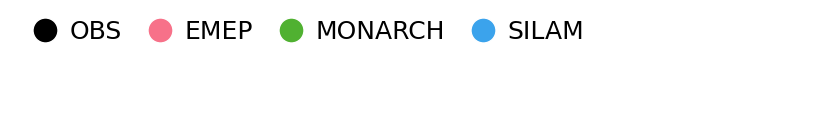

In [16]:
# make a legend plot
provi.make_plot('legend')

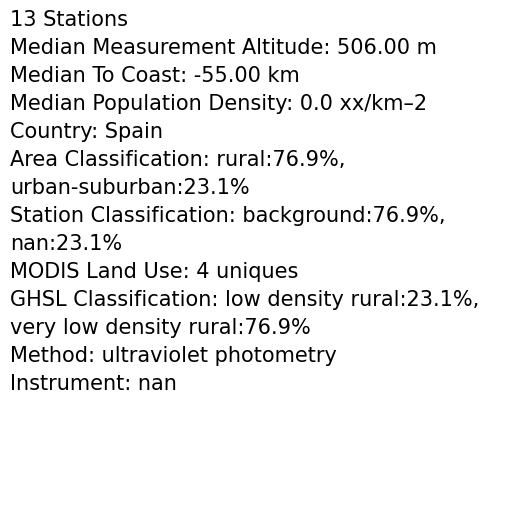

In [17]:
# make a metadata plot
provi.make_plot('metadata')

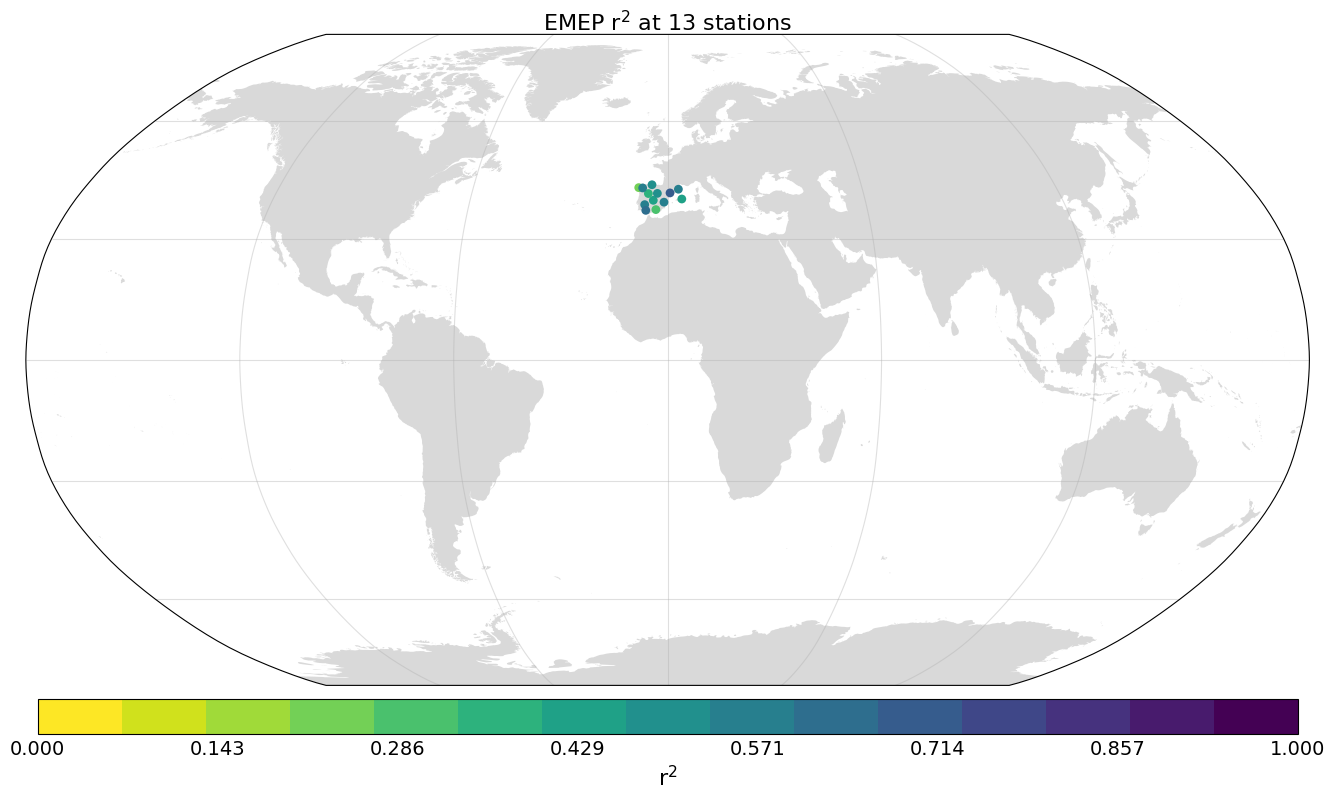

In [18]:
# make a map plot (r2 statistic)
provi.make_plot('map-r2', labela='OBS', labelb='EMEP', map_extent=[-180, 180, -90, 90])

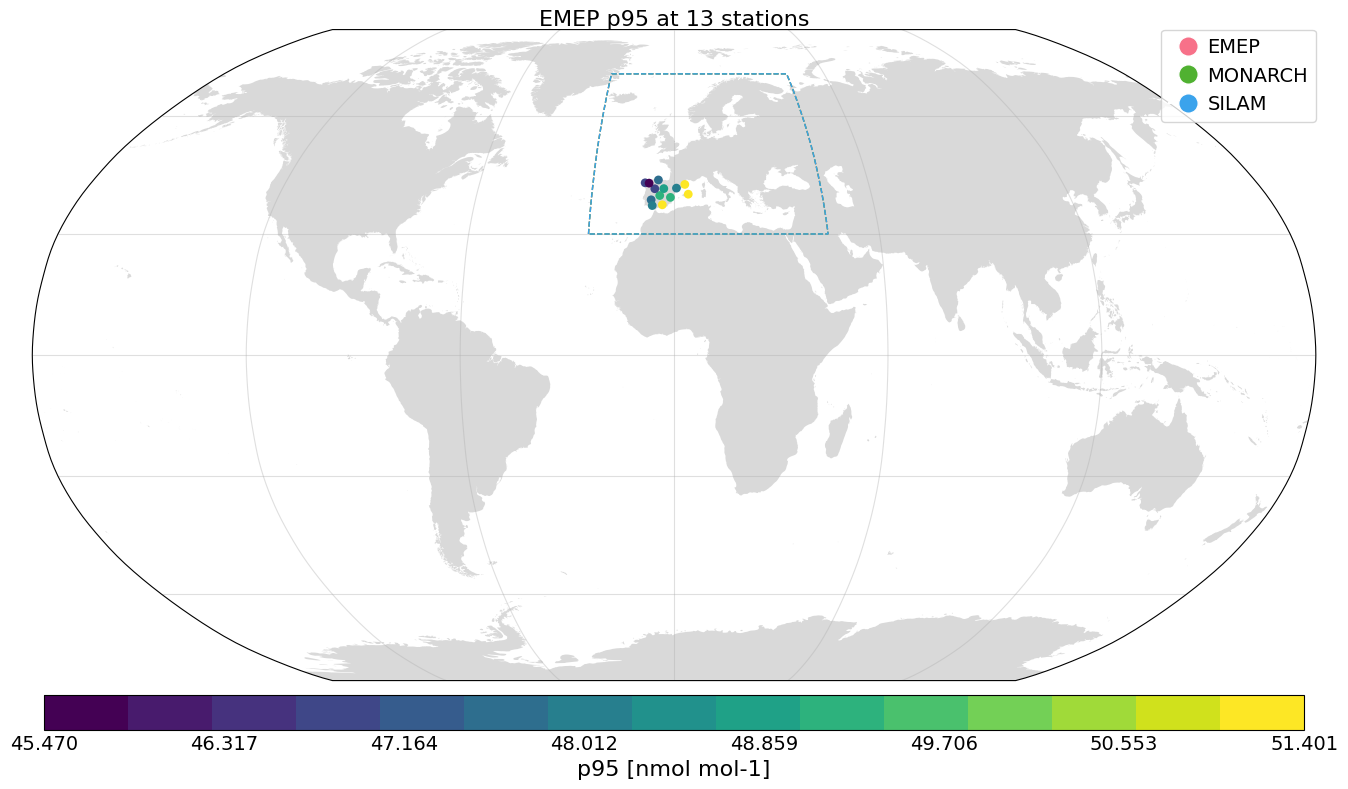

In [19]:
# make a map plot (p95 statistic)
provi.make_plot('map-p95', labela='EMEP', map_extent=[-180, 180, -90, 90], plot_options=['domain'])

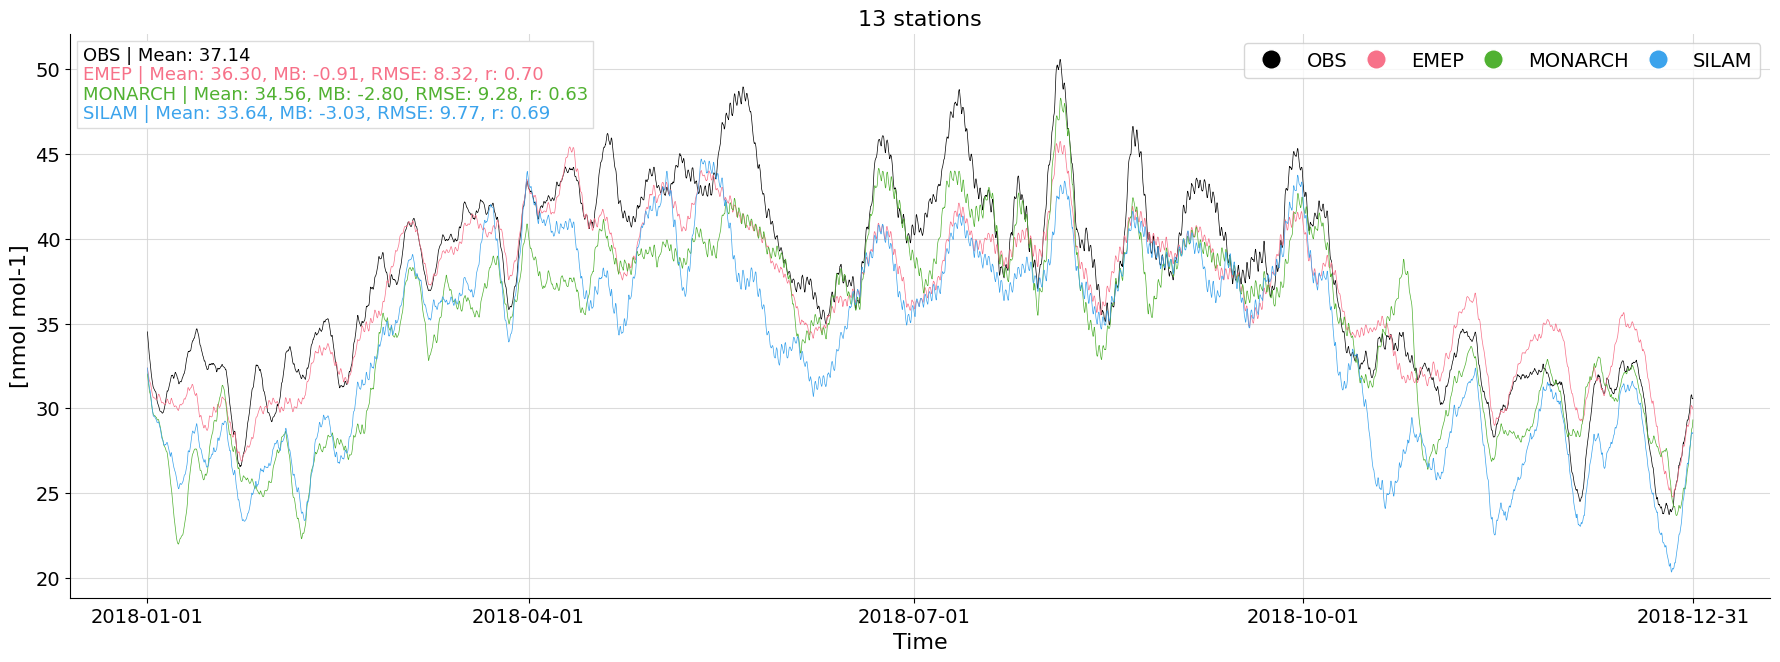

In [20]:
# make a timeseries plot
provi.make_plot('timeseries', annotate=True, smooth=100, hidedata=True)

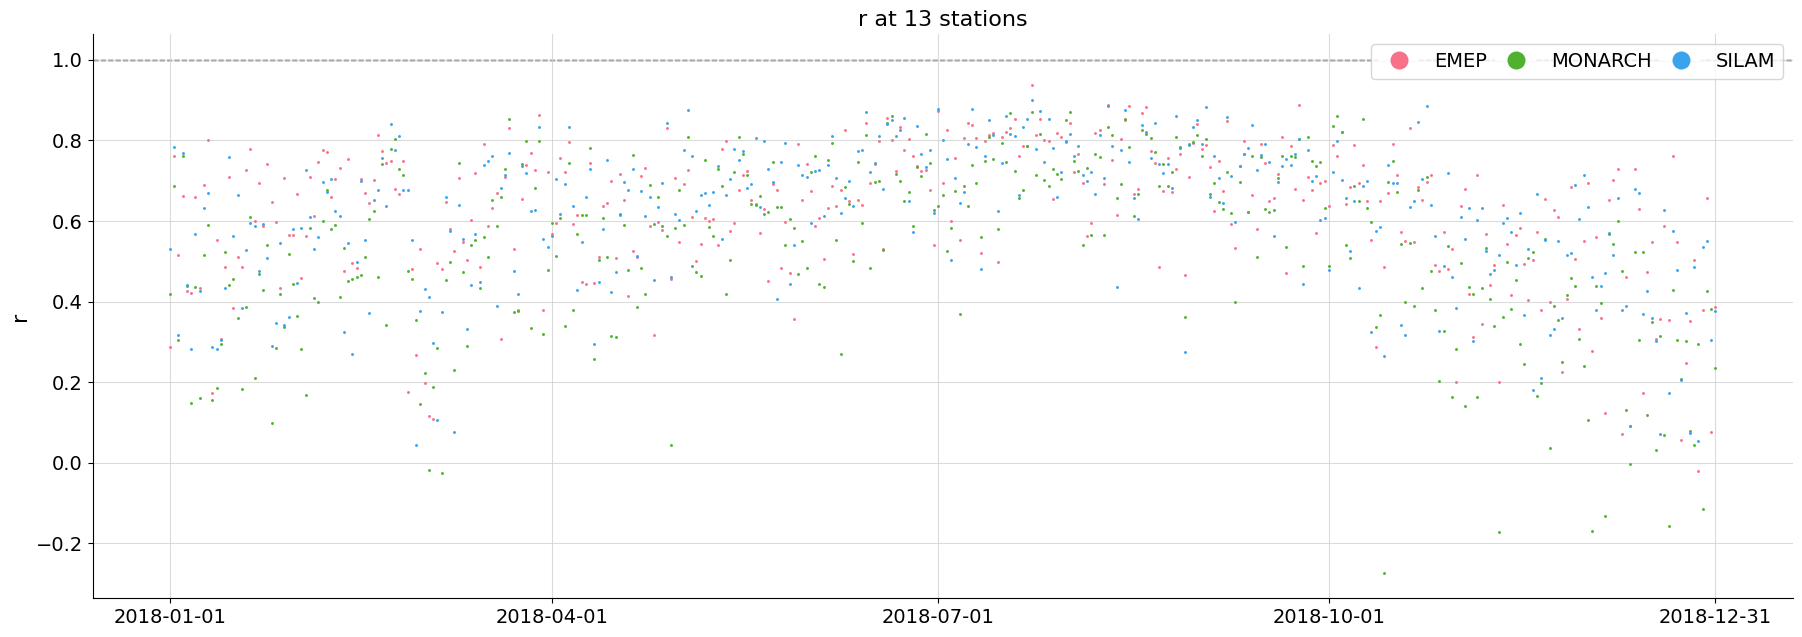

In [21]:
# make a statistical timeseries of r 
provi.make_plot('timeseries-r-daily')

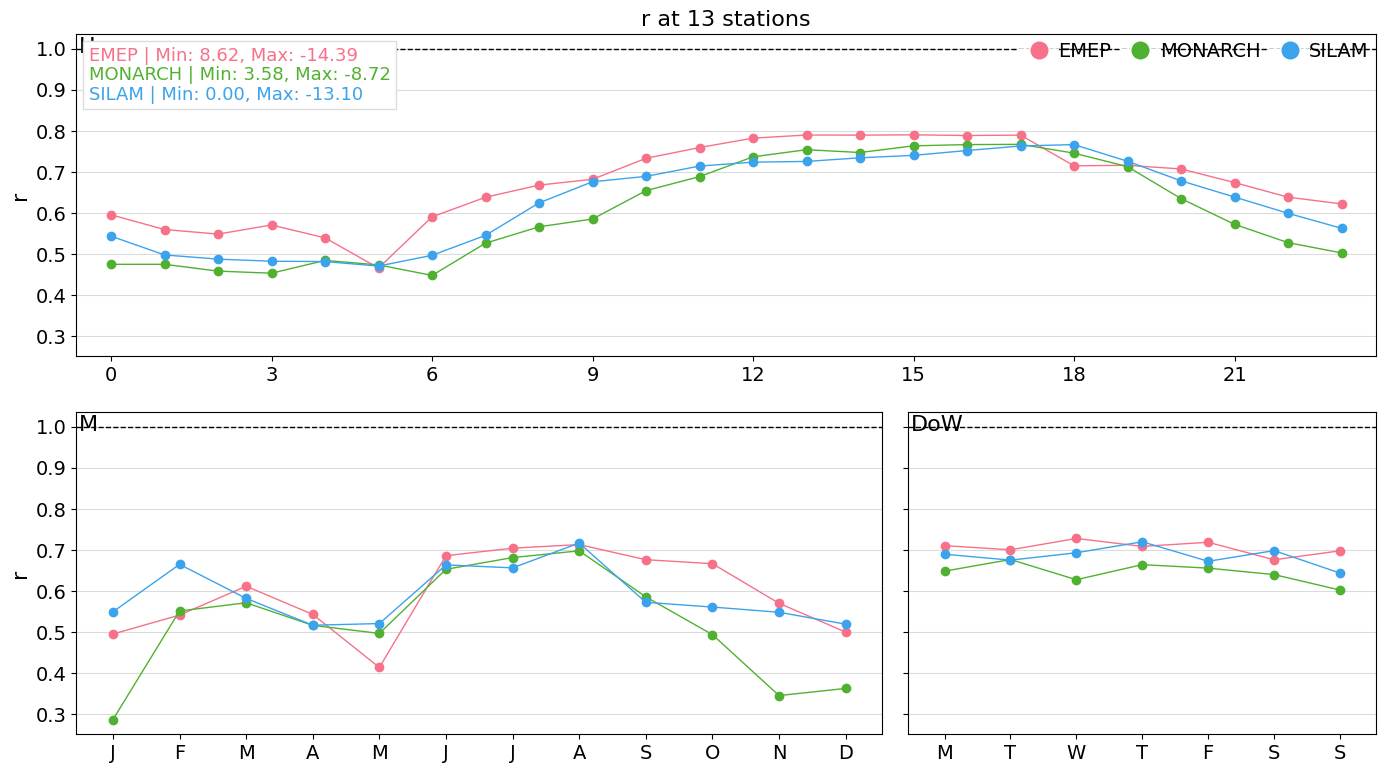

In [22]:
# make a periodic plot (r statistic)
provi.make_plot('periodic-r', plot_options=['annotate'])

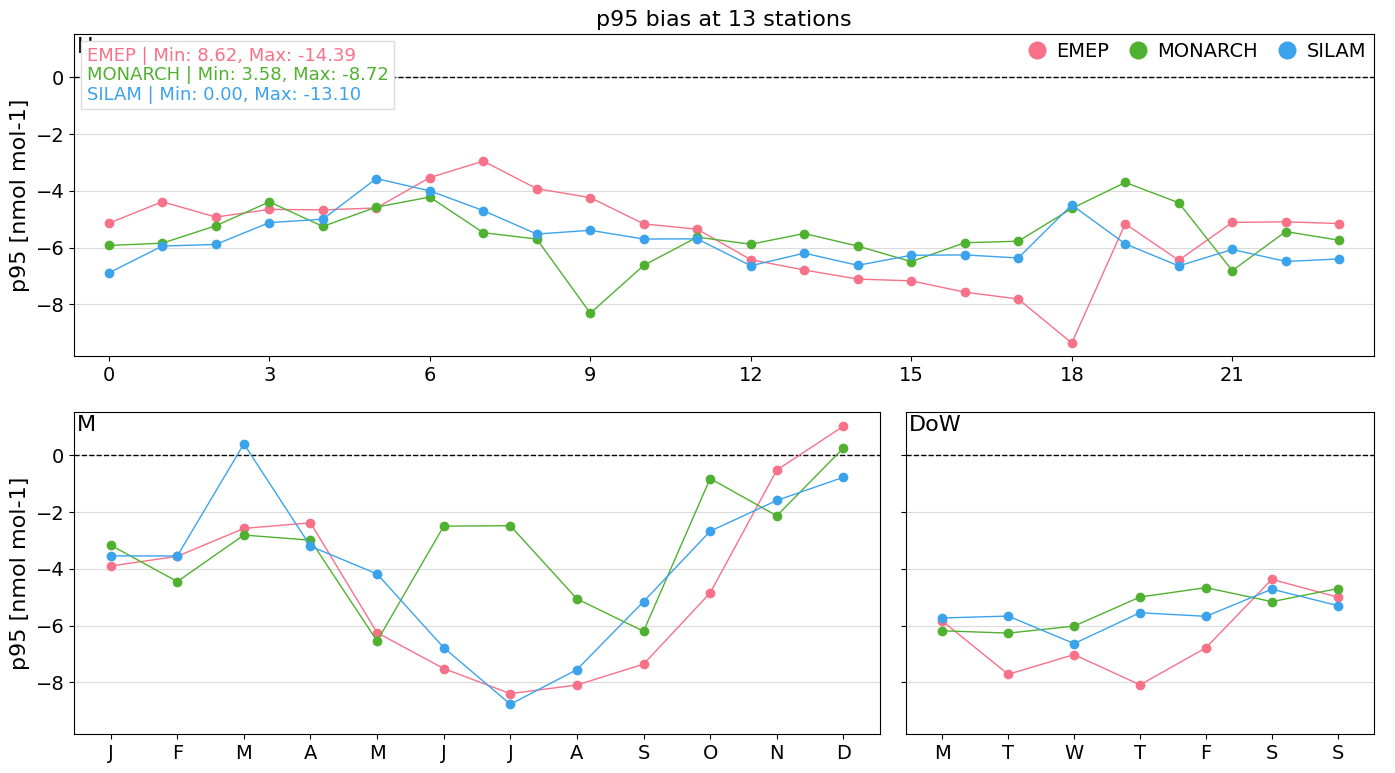

In [23]:
# make a periodic plot (p95 statistic)
provi.make_plot('periodic-p95', plot_options=['annotate','bias'])

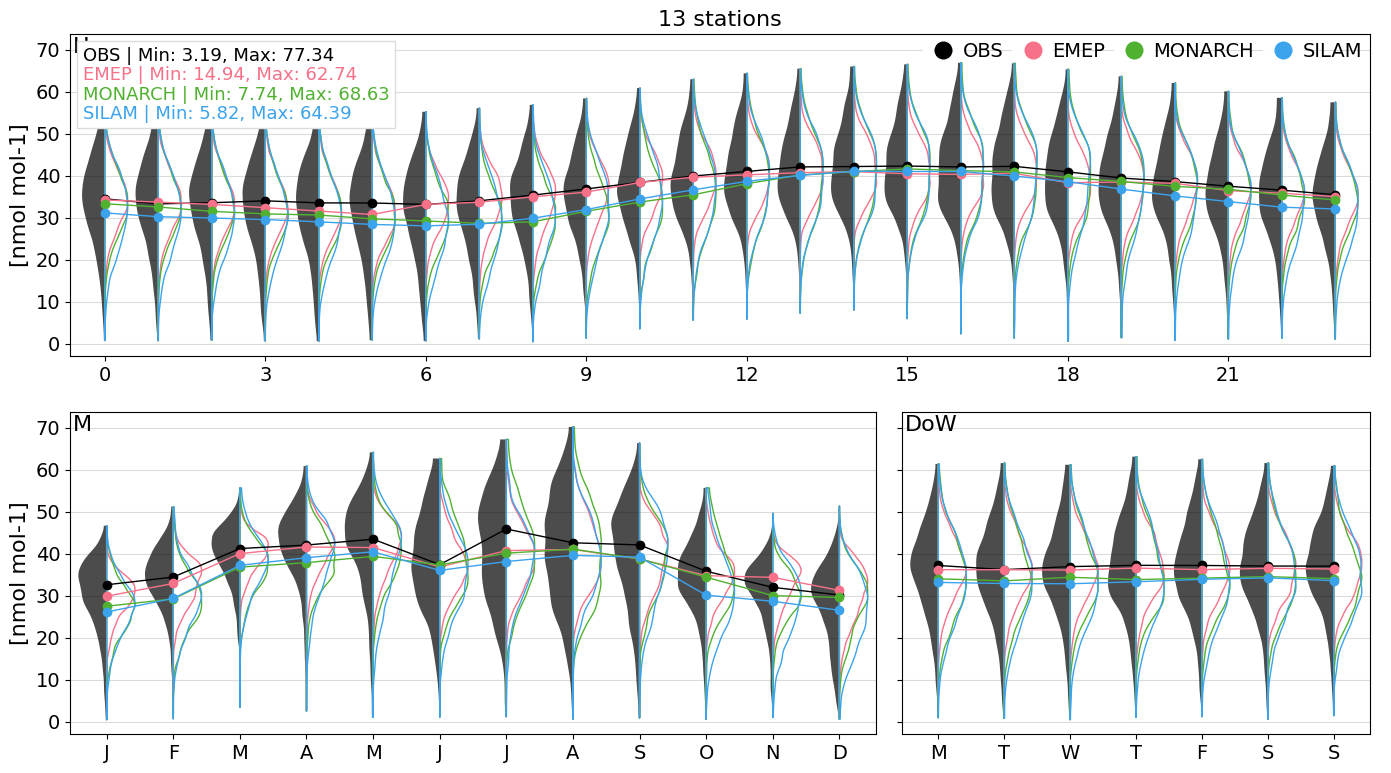

In [24]:
# make a periodic-violin plot
provi.make_plot('periodic-violin', plot_options=['annotate'])

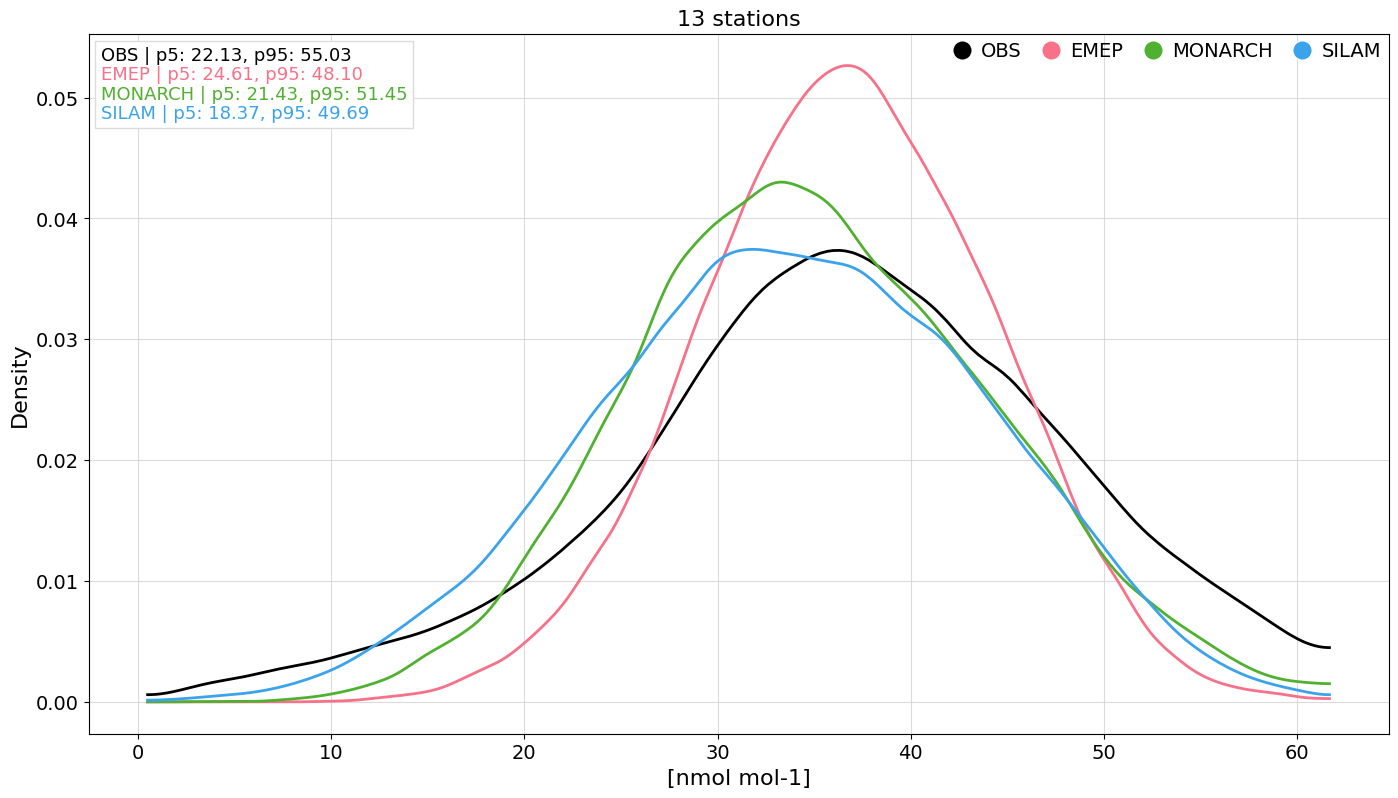

In [25]:
# make a distribution plot
provi.make_plot('distribution', annotate=['p5','p95'])

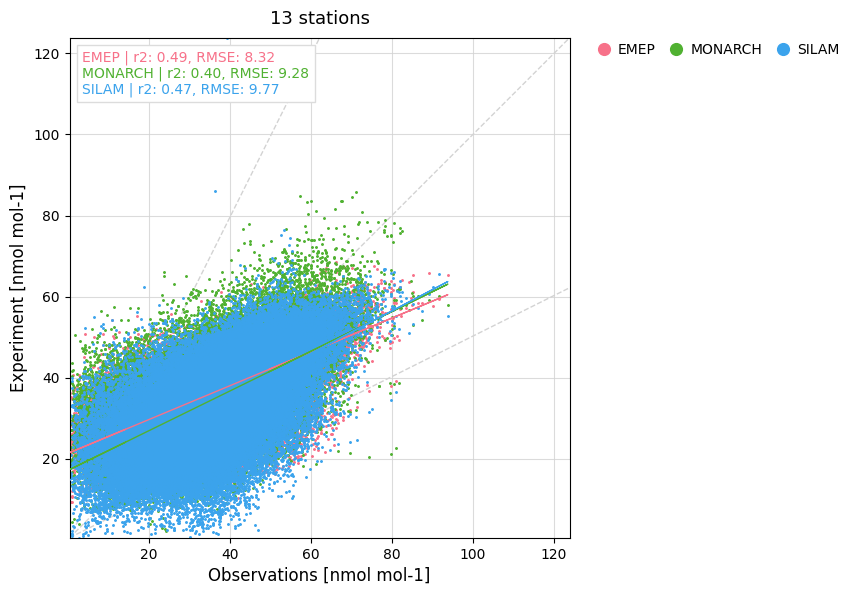

In [26]:
# make a scatter plot
provi.make_plot('scatter', plot_options=['annotate','regression'])

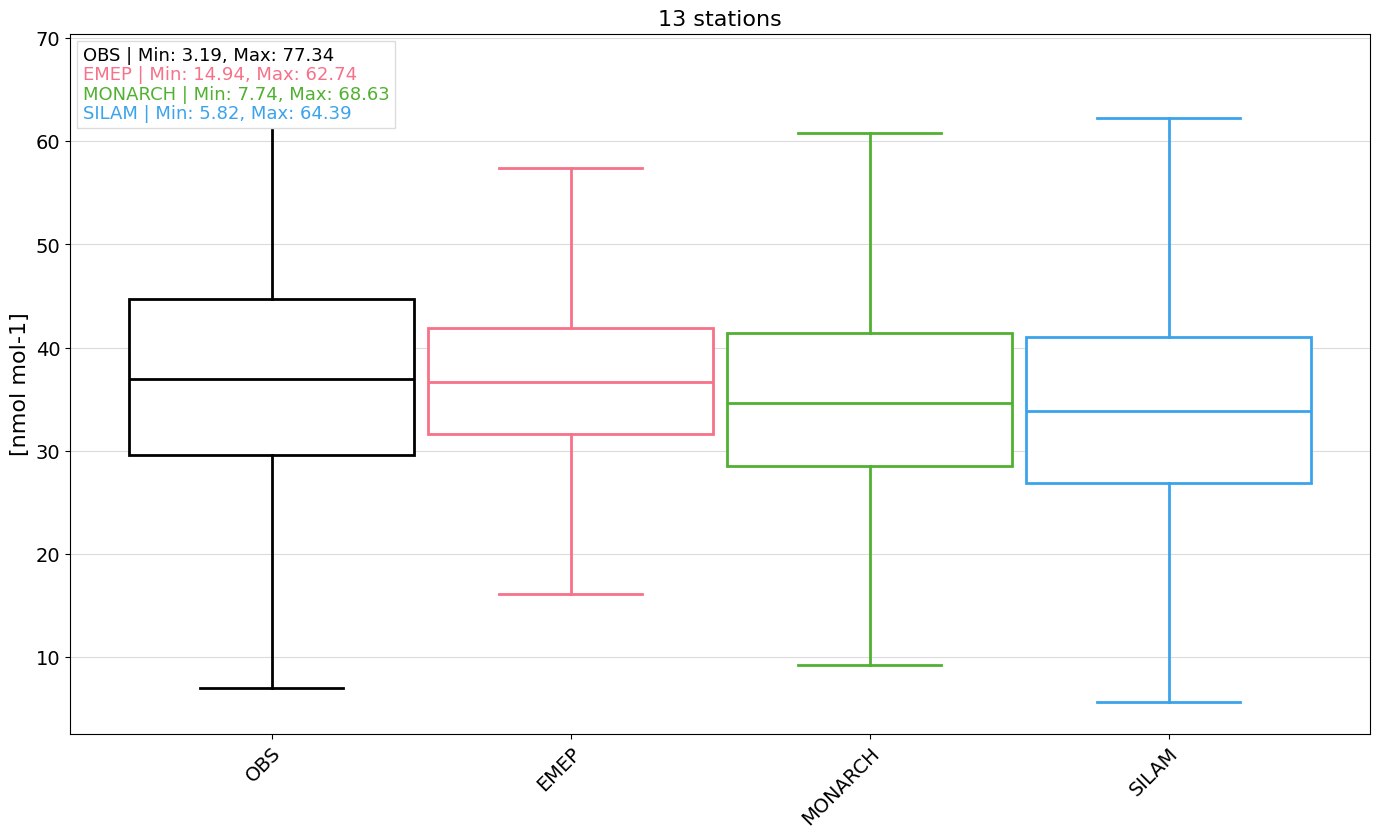

In [27]:
# make a boxplot
provi.make_plot('boxplot', plot_options=['annotate'])

Resetting filter for STANDARD·France
Filtering data
Resetting filter for STANDARD·Spain
Filtering data
Resetting filter for STANDARD·Spain
Filtering data


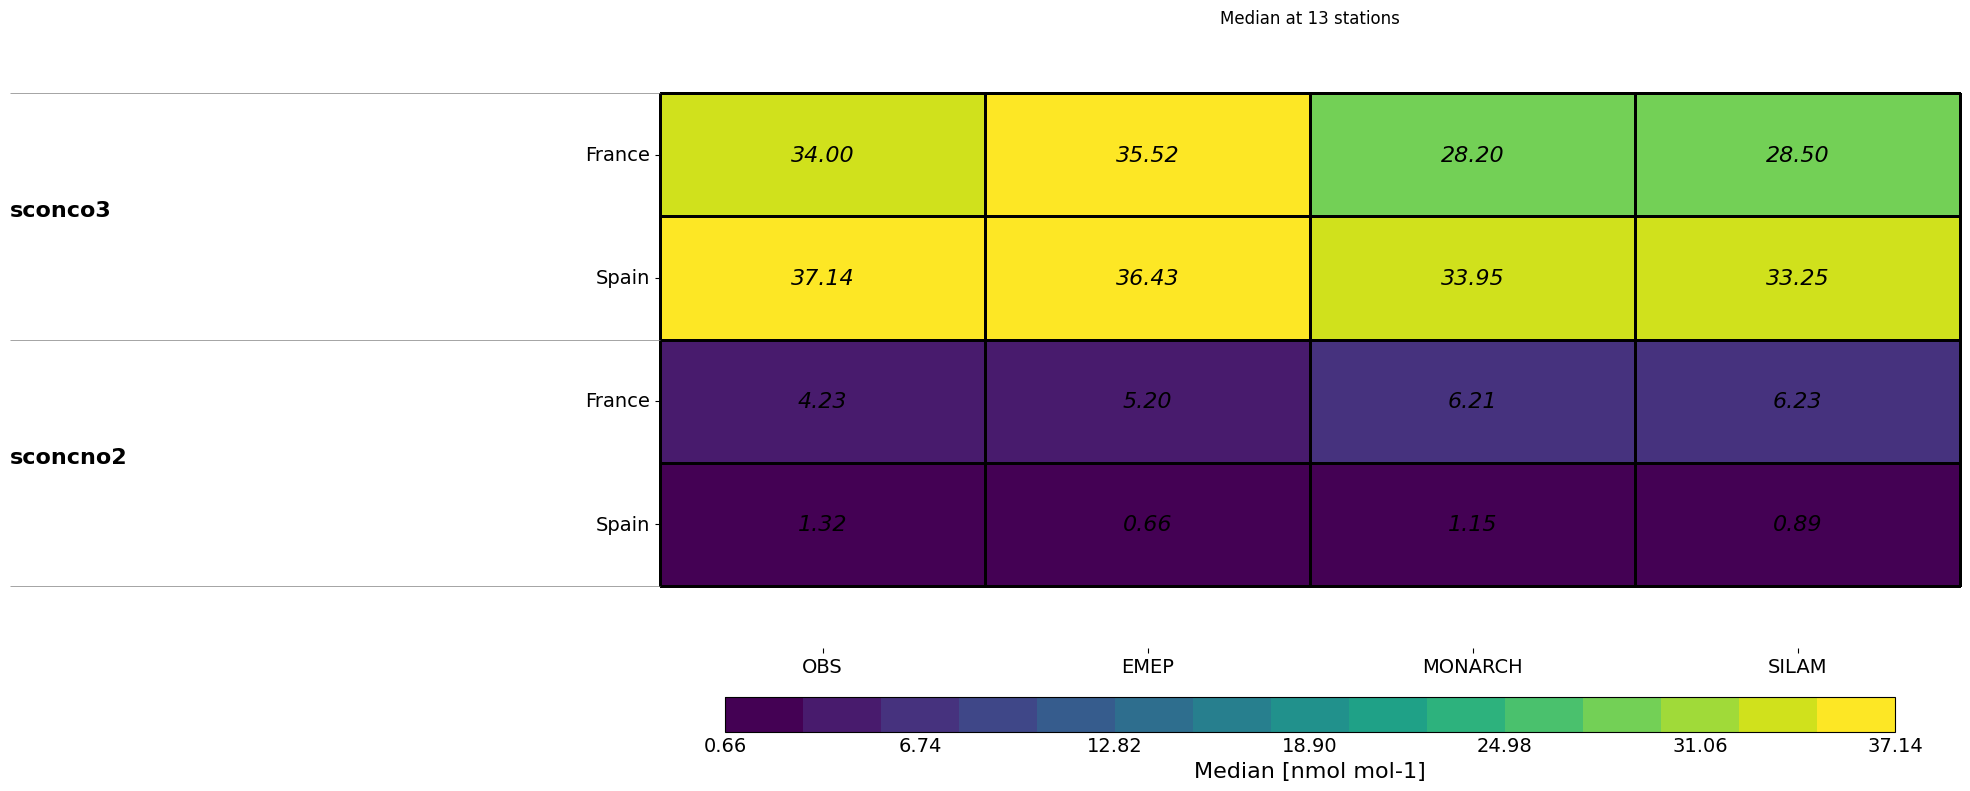

In [28]:
# make a heatmap (Median stat)
provi.make_plot('heatmap-Median', annotate=True, multispecies=True)

Resetting filter for STANDARD·France
Filtering data
Resetting filter for STANDARD·Spain
Filtering data
Resetting filter for STANDARD·Spain
Filtering data


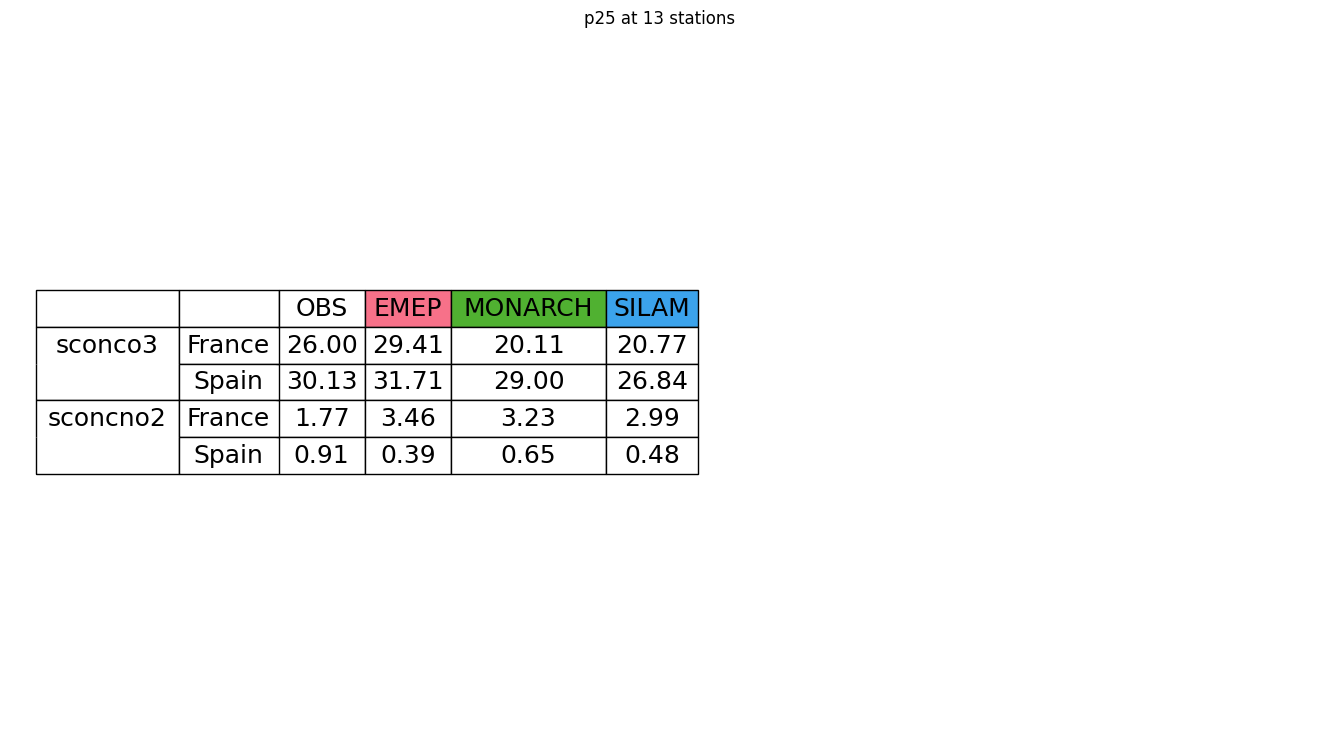

In [29]:
# make a table (p25 stat)
provi.make_plot('table-p25', multispecies=True)

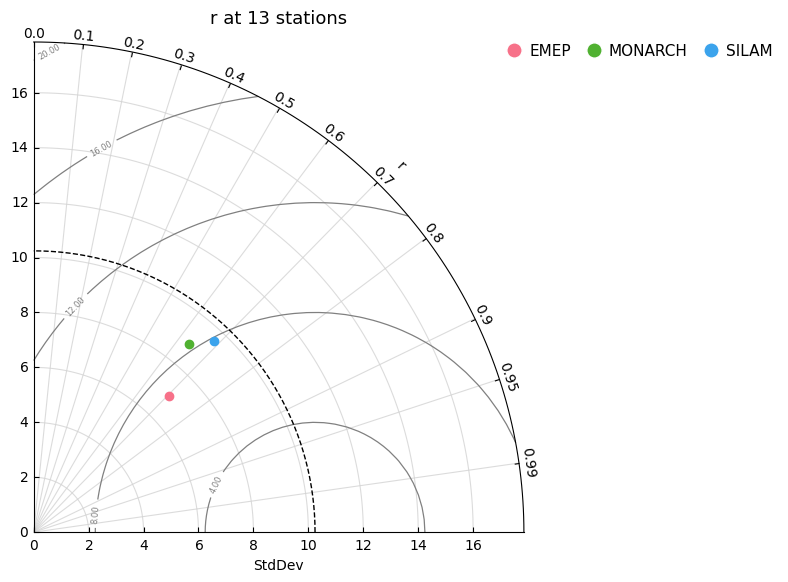

In [30]:
# make a Taylor diagram
provi.make_plot('taylor-r')

Resetting filter for STANDARD·France
Filtering data
Resetting filter for STANDARD·Spain
Filtering data
Resetting filter for STANDARD·Spain
Filtering data


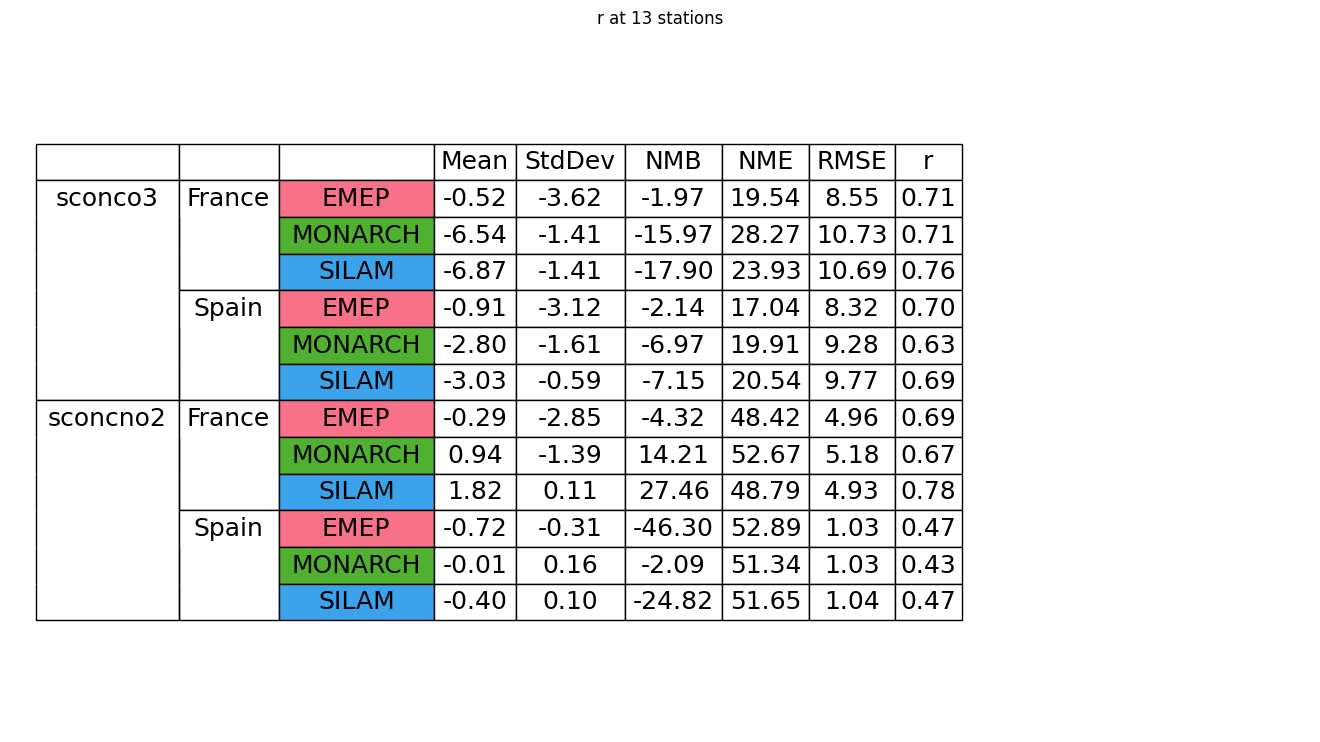

In [31]:
# make a statsummary plot
provi.make_plot('statsummary', multispecies=True, bias=True)

In [32]:
# save a statsummary plot
provi.make_plot('statsummary', multispecies=True, bias=True, save=True)

Resetting filter for STANDARD·France
Filtering data
Resetting filter for STANDARD·Spain
Filtering data
Resetting filter for STANDARD·Spain
Filtering data
Saving statsummary_bias_multispecies figure to /home/avilanov/software/Providentia/plots/statsummary_bias_multispecies.png


In [33]:
# return a statsummary plot
fig = provi.make_plot('statsummary', multispecies=True, bias=True, return_plot=True)

Resetting filter for STANDARD·France
Filtering data
Resetting filter for STANDARD·Spain
Filtering data
Resetting filter for STANDARD·Spain
Filtering data


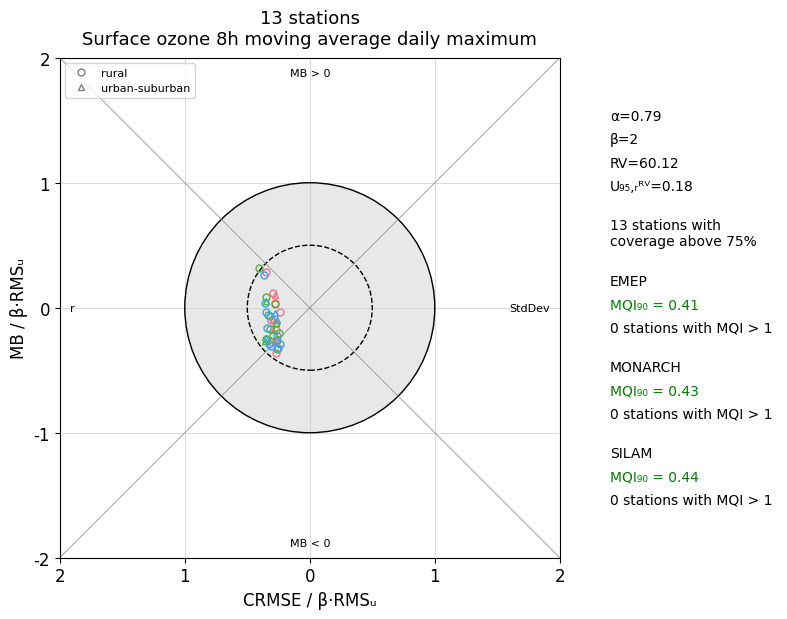

In [34]:
provi.make_plot('fairmode-target', annotate=True)

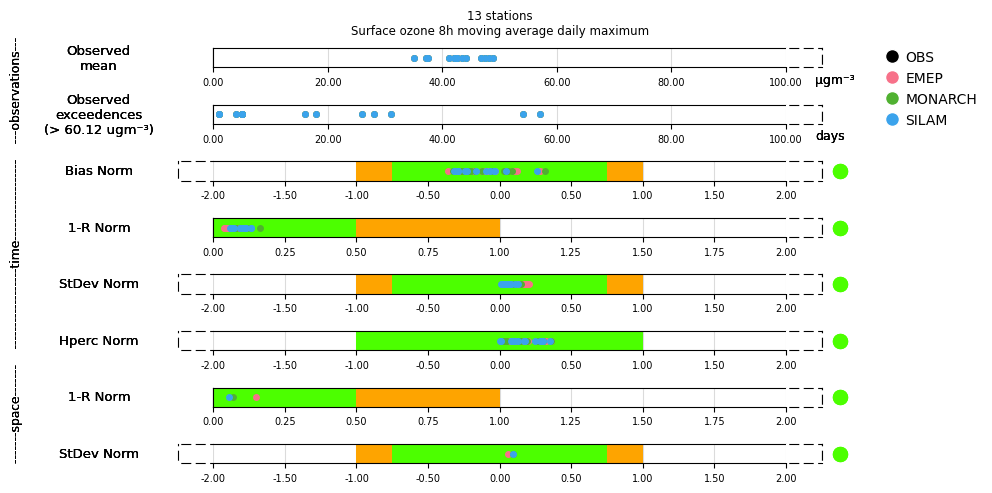

In [35]:
provi.make_plot('fairmode-statsummary')